In [622]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import datasets
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn import tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [623]:
#Datei einlesen
data = pd.read_csv('master.csv')

In [624]:
display(data)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,Albania1987,NaN,"2,15,66,24,900",796.000000,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,Albania1987,NaN,"2,15,66,24,900",796.000000,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,Albania1987,NaN,"2,15,66,24,900",796.000000,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,Albania1987,NaN,"2,15,66,24,900",796.000000,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,Ukraine2017,0.785458,1.12E+11,2638.326055,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,United Kingdom2017,0.914735,2.70E+12,40857.755580,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,United States of America2017,0.918620,1.95E+13,60109.655730,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,Uruguay2017,0.816745,64233966861,18690.893840,G.I. Generation


In [625]:
#alle Spaltennamen
print(data.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


In [626]:
#Datentyp der Spalten (+Null Werte)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31756 entries, 0 to 31755
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             31756 non-null  object 
 1   year                31756 non-null  int64  
 2   sex                 31756 non-null  object 
 3   age                 31756 non-null  object 
 4   suicides_no         30556 non-null  float64
 5   population          31756 non-null  int64  
 6   suicides/100k pop   31756 non-null  float64
 7   country-year        31756 non-null  object 
 8   HDI for year        12300 non-null  float64
 9    gdp_for_year ($)   31756 non-null  object 
 10  gdp_per_capita ($)  31756 non-null  float64
 11  generation          31756 non-null  object 
dtypes: float64(4), int64(2), object(6)
memory usage: 2.9+ MB


In [627]:
#Zeilen- und Spaltenanzahl
data.shape

(31756, 12)

In [628]:
#Anzahl der fehlenden oder Null Werte
print(data.isnull().sum())

country                   0
year                      0
sex                       0
age                       0
suicides_no            1200
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64


<Axes: >

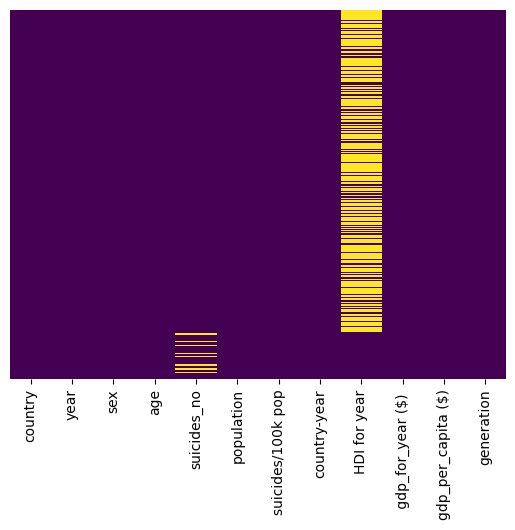

In [629]:
#fehlende Werte als graphische Darstellung
sns.heatmap(data.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [630]:
#Spalte von dem GDP der Hauptstadt entfernen 
dataclean = data.drop(columns = ['gdp_per_capita ($)'])

#Spalte vom HDI entfernen 
dataclean = dataclean.drop(columns = ['HDI for year'])

#Spalte mit Land-Jahr entfernen
dataclean = dataclean.drop(columns = ['country-year'])

In [631]:
#Zeile vom jährlichen GDP umbennen
dataclean = dataclean.rename(columns= {' gdp_for_year ($) ': 'gdp_for_year ($)'})

In [632]:
# alle Werte der USA werden bis 2015 als United States betitelt und danach als United States of America
# deswegen alle Werte der USA gleich betiteln mit 'United States of America'
dataclean['country'].replace('United States', 'United States of America', inplace=True)

In [633]:
#Alle null-Werte dropen
dataclean = dataclean.dropna()

#Kommas in der Spalte GDP entfernen 
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].str.replace(',', '')

In [634]:
#gdp Daten von objekt in float umgewandelt 
dataclean['gdp_for_year ($)'] = dataclean['gdp_for_year ($)'].astype(float)

In [635]:
display(dataclean)

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),generation
0,Albania,1987,male,15-24 years,21.0,312900,6.710000,2.156625e+09,Generation X
1,Albania,1987,male,35-54 years,16.0,308000,5.190000,2.156625e+09,Silent
2,Albania,1987,female,15-24 years,14.0,289700,4.830000,2.156625e+09,Generation X
3,Albania,1987,male,75+ years,1.0,21800,4.590000,2.156625e+09,G.I. Generation
4,Albania,1987,male,25-34 years,9.0,274300,3.280000,2.156625e+09,Boomers
...,...,...,...,...,...,...,...,...,...
31751,Ukraine,2017,female,75+ years,256.0,44831135,0.571032,1.120000e+11,G.I. Generation
31752,United Kingdom,2017,female,75+ years,104.0,66058859,0.157435,2.700000e+12,G.I. Generation
31753,United States of America,2017,female,75+ years,501.0,325122128,0.154096,1.950000e+13,G.I. Generation
31754,Uruguay,2017,female,75+ years,14.0,3422200,0.409094,6.423397e+10,G.I. Generation


In [636]:
#Name der Spalten
print(dataclean.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'gdp_for_year ($)', 'generation'],
      dtype='object')


In [637]:
#Zeilen- und Spaltenanzahl 
dataclean.shape 

(30556, 9)

In [638]:
# Null-Werte des bereinigten Datensatz (Kontrolle)
print(dataclean.isnull().sum())

country              0
year                 0
sex                  0
age                  0
suicides_no          0
population           0
suicides/100k pop    0
gdp_for_year ($)     0
generation           0
dtype: int64


<Axes: >

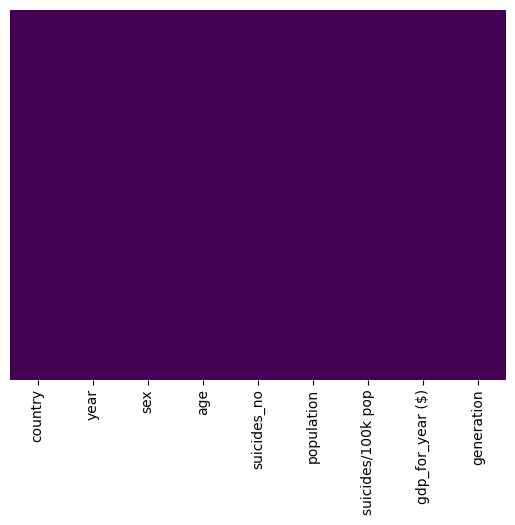

In [639]:
#fehlende Nullwerte graphsich (Kontrolle)
sns.heatmap(dataclean.isnull(),yticklabels=False, cbar = False, cmap = 'viridis')

In [640]:
#Minimum, Maximum, Standartabweichungen, Median und Quartale aller numerischen Werte
dataclean.describe()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
count,30556.000000,30556.000000,3.055600e+04,30556.000000,3.055600e+04
mean,2002.766854,237.136242,4.990492e+06,12.176806,5.437237e+11
std,9.408922,867.956107,3.352492e+07,21.883165,2.353760e+12
min,1985.000000,0.000000,2.780000e+02,0.000000,4.691962e+07
25%,1995.000000,3.000000,1.198480e+05,0.553214,1.017287e+10
50%,2003.000000,25.000000,5.148010e+05,4.790000,5.385106e+10
75%,2010.000000,132.000000,2.401046e+06,15.150000,2.760000e+11
max,2020.000000,22338.000000,1.396215e+09,515.092734,5.100000e+13


In [641]:
#alle nummerischen Spalten rausfiltern
allnumbers = dataclean.select_dtypes(include=['number'])

#Korrelationsmatrix ertsellen 
corr = allnumbers.corr()

#Farbgestaltung der Korrelationsmatrix
corr.style.background_gradient(cmap='coolwarm')

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($)
year,1.000000,-0.013955,0.152605,-0.075636,0.116055
suicides_no,-0.013955,1.000000,0.099528,0.270322,0.290381
population,0.152605,0.099528,1.000000,-0.050510,0.281185
suicides/100k pop,-0.075636,0.270322,-0.050510,1.000000,0.299586
gdp_for_year ($),0.116055,0.290381,0.281185,0.299586,1.000000


In [642]:
#Einlesen Datei HDI
hdi = pd.read_csv('HDR21-22_Statistical_Annex_HDI_Trends_Table.csv')

#Spaltennamen von HDI an unseren Datensatz anpassen
hdi = hdi.rename(columns = {'Country': 'country'})

In [643]:
#neuer Datensatz aus unserem Datensatz und HDI über einen inneren Join 
merged_data = pd.merge(dataclean, hdi, on='country', how='inner')

def get_value(row):
    year = row['year']
    column = f'hdi_{year}'
               
    if column in merged_data.columns:
        return row[column]
    else:
        return None
               
merged_data['hdi'] = merged_data.apply(get_value, axis=1)
               
merged_data = merged_data[['year', 'country', 'sex', 'age', 'suicides_no', 'hdi']].dropna()

In [644]:
display(merged_data)

,year,country,sex,age,suicides_no,hdi
132,2000,Albania,male,25-34 years,17.0,0.677
133,2000,Albania,male,55-74 years,10.0,0.677
134,2000,Albania,female,75+ years,2.0,0.677
135,2000,Albania,male,75+ years,1.0,0.677
136,2000,Albania,female,15-24 years,6.0,0.677
...,...,...,...,...,...,...
28376,2018,Peru,female,15-24 years,62.0,0.776
28378,2018,Peru,female,25-34 years,33.0,0.776
28380,2018,Peru,female,35-54 years,24.0,0.776
28382,2018,Peru,female,55-74 years,10.0,0.776


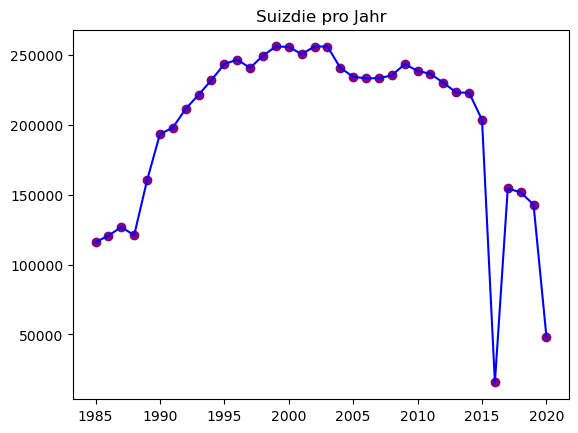

In [645]:
#Aufsummieren aller Suizide für jedes Jahr 
year_no = dataclean.groupby('year')['suicides_no'].sum().reset_index()

#Punkte des Liniendiagramms erstellen
plt.plot(year_no['year'], year_no['suicides_no'], color = 'blue')

#Linie des Liniendiagramms erstellen
plt.scatter(year_no['year'], year_no['suicides_no'],color = 'purple')

#Titel des Liniendiagramms 
plt.title('Suizdie pro Jahr')

#Ausgabe Liniendiagramms 
plt.show()

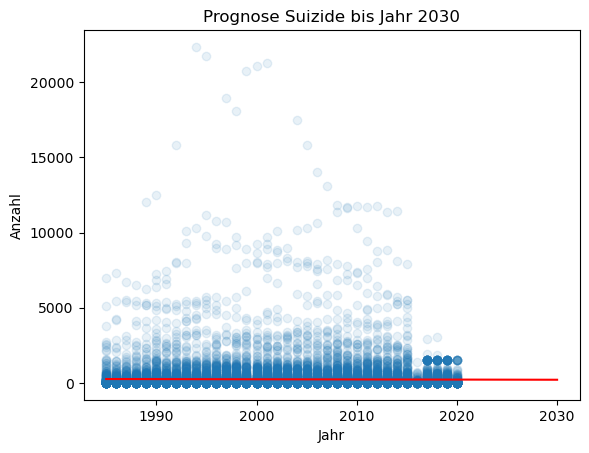

In [646]:
#Lineare Regression 
regressor_jahr = LinearRegression()

#Input Variable 
x_jahr = dataclean['year']

#Output-Variable 
y_jahr = dataclean['suicides_no']

#Aufteilen in Test- und Trainingsdaten 
x_jahr_train,x_jahr_test,y_jahr_train,y_jahr_test=train_test_split(x_jahr,y_jahr,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_jahr.fit(np.array(x_jahr_train).reshape(-1, 1), np.array(y_jahr_train).reshape(-1, 1))

#Array für x bis 2030
x_j = np.linspace(min(x_jahr_train), 2030)

#Arrray für y 
y_j = regressor_jahr.coef_ * x_j + regressor_jahr.intercept_

#Umformung in 2D-Array 
y_j = y_j.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_jahr_train, y = y_jahr_train, alpha = 0.1)
plt.plot(x_j, y_j, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizide bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

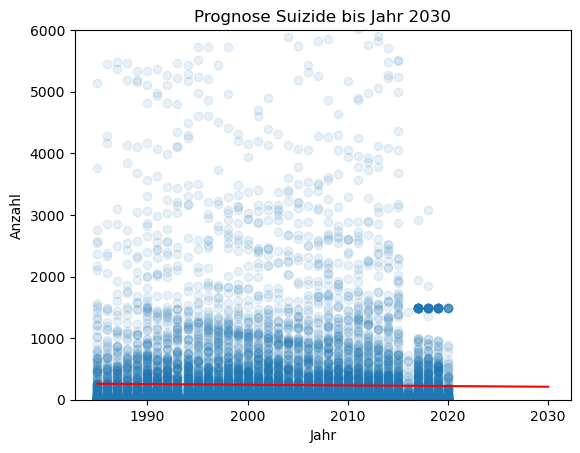

In [647]:
#Bessere (aber unvollständige) Darstellung
plt.scatter(x = x_jahr_train, y = y_jahr_train, alpha = 0.1)
plt.plot(x_j, y_j, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizide bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,6000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [648]:
#Steigung lineare Progression
print(regressor_jahr.coef_)

#Suizide insgesamt für 2030
suizide_2030 = np.array([[2030]])  
suizide_predict = regressor_jahr.predict(suizide_2030)
print(suizide_predict)

[[-1.07210198]]
[[210.92477501]]


In [649]:
#Interpretation:
#pro Jahr durchschnittlich 1.07210198 Suizide weniger  
#im Jahr 2030 wird es wahrscheinlich 210.92477501 Suizidfälle geben

In [650]:
#Trainingsfehler der linearen Regression
y_jahr_train_pred = regressor_jahr.predict(np.array(x_jahr_train).reshape(-1,1))
r2_jahr =  r2_score(y_jahr_train, y_jahr_train_pred)
MSE_jahr =  mean_squared_error(y_jahr_train, y_jahr_train_pred)
print(r2_jahr)
print(MSE_jahr)

0.00013098026539126728
776974.4796867933


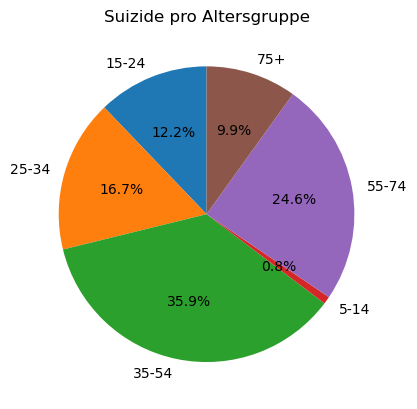

In [651]:
#Aufssumieren aller Suizide für jede Altersklasse
age_no = dataclean.groupby('age')['suicides_no'].sum().reset_index()

#Balkendiagramm erstellen
plt.pie(age_no['suicides_no'],labels=['15-24', '25-34','35-54', '5-14', '55-74', '75+'],autopct='%1.1f%%', startangle=90)

#Titel des Kuchendiagramms 
plt.title('Suizide pro Altersgruppe')

#Ausgabe 
plt.show()

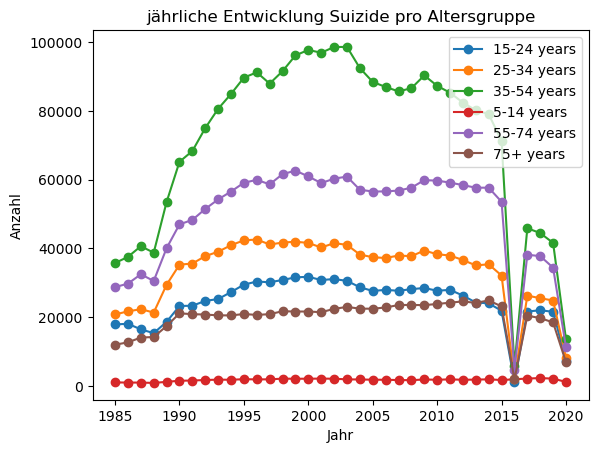

In [652]:
#Aufsummierung aller Suizide pro Altersgruppe pro Jahr 
datahelp_age = dataclean.groupby(['year','age'])['suicides_no'].sum().reset_index()

#Erstellung Liniendiagramm
for age, suicides in datahelp_age.groupby('age'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=age, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro Altersgruppe')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

In [653]:
#Alle Suizide der 5-14 Jährigen
word = '5-14 years'
suicide_5 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_5 = dataclean[dataclean['age'] == word]['year'].tolist()

#Neue Tabelle
five = pd.DataFrame({'suicide': suicide_5, 'year': year_5})

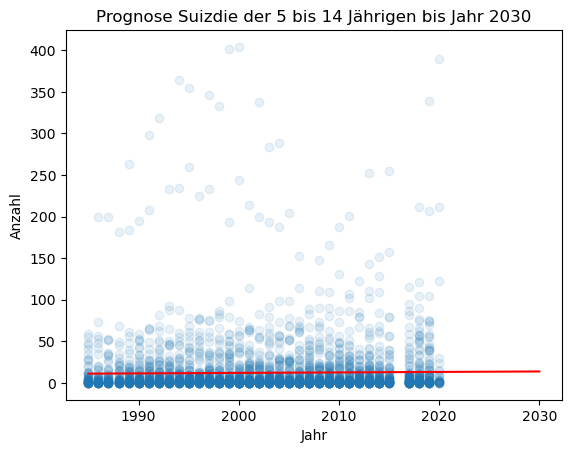

In [654]:
#Lineare Regression 
regressor_five = LinearRegression()

#Input Variable 
x_five = five['year']

#Output-Variable 
y_five = five['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_five_train,x_five_test,y_five_train,y_five_test=train_test_split(x_five,y_five,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_five.fit(np.array(x_five_train).reshape(-1, 1), np.array(y_five_train).reshape(-1, 1))

#Array für x bis 2030
x_fi = np.linspace(min(x_five_train), 2030, 500)

#Arrray für y 
y_fi = regressor_five.coef_ * x_fi + regressor_five.intercept_

#Umformung in 2D-Array 
y_fi = y_fi.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_five_train, y = y_five_train, alpha = 0.1)
plt.plot(x_fi, y_fi, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 5 bis 14 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()


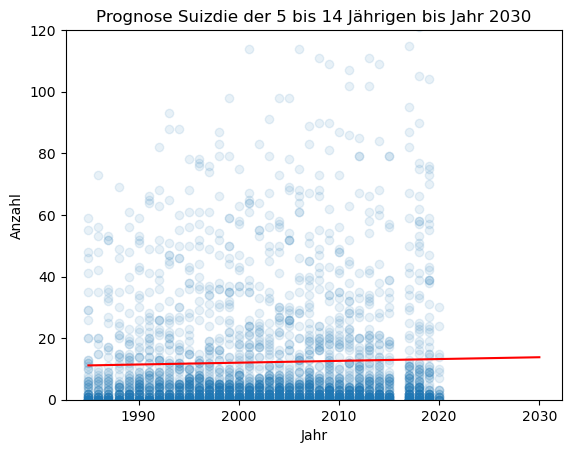

In [655]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_five_train, y = y_five_train, alpha = 0.1)
plt.plot(x_fi, y_fi, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 5 bis 14 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,120)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [656]:
#Steigung lineare Progression
print(regressor_five.coef_)

#Suizide der 5 -14 Jährigen für 2030
five_2030 = np.array([[2030]])  
five_predict = regressor_five.predict(five_2030)
print(five_predict)

[[0.05895661]]
[[13.79499429]]


In [657]:
#Interpretation:
#die Suizide der 5-14 jährigen steigen pro Jahr um 0.05895661
#2030 wird es wahrscheilich 13.79499429 Suizide der 5-14 Jähriigen geben 

In [658]:
#Trainingsfehler der linearen Regression
y_five_train_pred = regressor_five.predict(np.array(x_five_train).reshape(-1,1))
r2_five =  r2_score(y_five_train, y_five_train_pred)
MSE_five =  mean_squared_error(y_five_train, y_five_train_pred)
print(r2_five)
print(MSE_five)

0.0002903703268126723
1054.800343414629


In [659]:
#Alle Suizide der 15-24 Jährigen
word = '15-24 years'
suicide_15 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_15 = dataclean[dataclean['age'] == word]['year'].tolist()

#Neue Tabelle
fiveteen = pd.DataFrame({'suicide': suicide_15, 'year': year_15})

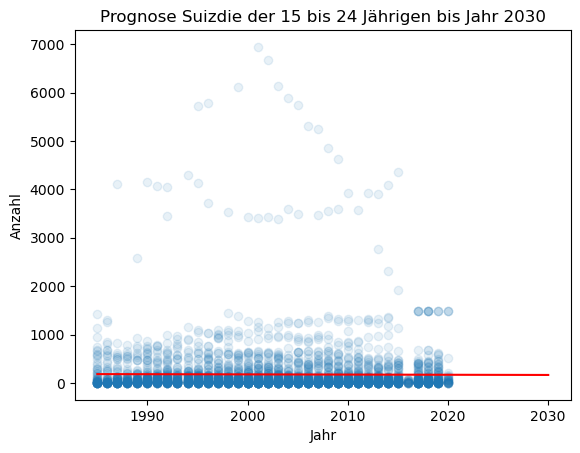

In [660]:
#Lineare Regression 
regressor_fiveteen = LinearRegression()

#Input Variable 
x_fiveteen = fiveteen['year']

#Output-Variable 
y_fiveteen = fiveteen['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_fiveteen_train,x_fiveteen_test,y_fiveteen_train,y_fiveteen_test=train_test_split(x_fiveteen,y_fiveteen,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_fiveteen.fit(np.array(x_fiveteen_train).reshape(-1, 1), np.array(y_fiveteen_train).reshape(-1, 1))

#Array für x bis 2030
x_fiv = np.linspace(min(x_fiveteen_train), 2030, 500)

#Arrray für y 
y_fiv = regressor_fiveteen.coef_ * x_fiv + regressor_fiveteen.intercept_

#Umformung in 2D-Array 
y_fiv = y_fiv.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_fiveteen_train, y = y_fiveteen_train, alpha = 0.1)
plt.plot(x_fiv, y_fiv, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 15 bis 24 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

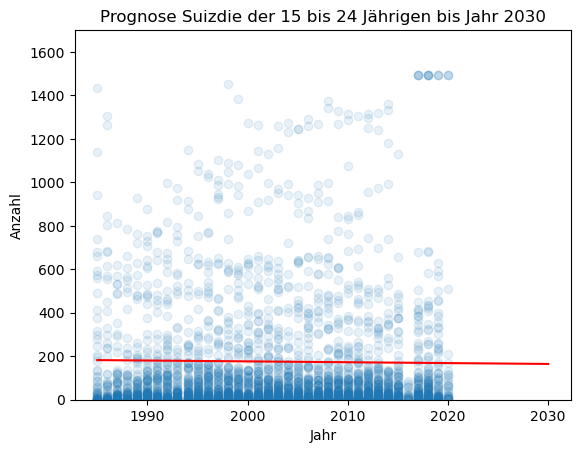

In [661]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_fiveteen_train, y = y_fiveteen_train, alpha = 0.1)
plt.plot(x_fiv, y_fiv, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 15 bis 24 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1700)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [662]:
#Steigung lineare Progression
print(regressor_fiveteen.coef_)

#Suizide der 15 -24 Jährigen für 2030
fiveteen_2030 = np.array([[2030]])  
fiveteen_predict = regressor_fiveteen.predict(fiveteen_2030)
print(fiveteen_predict)

[[-0.39327871]]
[[164.57360271]]


In [663]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei 15-24 Jährigen um 0.39327871
#in 2030 wird es wahrscheinlich 164.57360271 Suizide der 15-24 Jährigen geben

In [664]:
#Trainingsfehler der linearen Regression
y_fiveteen_train_pred = regressor_fiveteen.predict(np.array(x_fiveteen_train).reshape(-1,1))
r2_fiveteen =  r2_score(y_fiveteen_train, y_fiveteen_train_pred)
MSE_fiveteen =  mean_squared_error(y_fiveteen_train, y_fiveteen_train_pred)
print(r2_fiveteen)
print(MSE_fiveteen)

5.2637935440635886e-05
258015.81979816448


In [665]:
#Alle Suizide der 25-34 Jährigen
word = '25-34 years'
suicide_25 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_25 = dataclean[dataclean['age'] == word]['year'].tolist()

#Neue Tabelle
twentyfive = pd.DataFrame({'suicide': suicide_25, 'year': year_25})

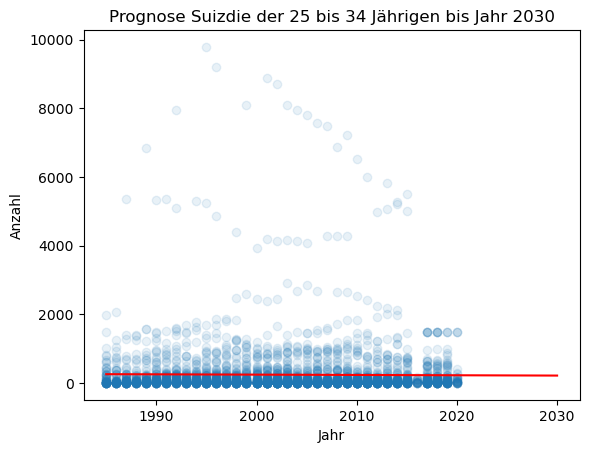

In [666]:
#Lineare Regression 
regressor_twentyfive = LinearRegression()

#Input Variable 
x_twentyfive = twentyfive['year']

#Output-Variable 
y_twentyfive = twentyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_twentyfive_train,x_twentyfive_test,y_twentyfive_train,y_twentyfive_test=train_test_split(x_twentyfive,y_twentyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_twentyfive.fit(np.array(x_twentyfive_train).reshape(-1, 1), np.array(y_twentyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_t = np.linspace(min(x_twentyfive_train), 2030, 500)

#Arrray für y 
y_t = regressor_twentyfive.coef_ * x_t + regressor_twentyfive.intercept_

#Umformung in 2D-Array 
y_t = y_t.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_twentyfive_train, y = y_twentyfive_train, alpha = 0.1)
plt.plot(x_t, y_t, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 25 bis 34 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

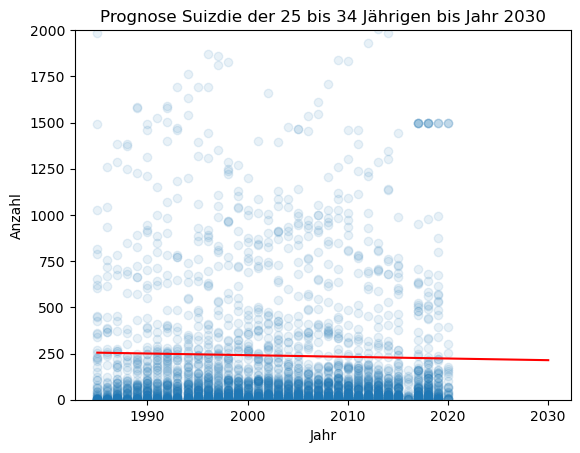

In [667]:
#Diagramm erstellen
plt.scatter(x = x_twentyfive_train, y = y_twentyfive_train, alpha = 0.1)
plt.plot(x_t, y_t, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 25 bis 34 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,2000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [668]:
#Steigung lineare Progression
print(regressor_twentyfive.coef_)

#Suizide der 25-34 Jährigen für 2030
twentyfive_2030 = np.array([[2030]])  
twentyfive_predict = regressor_twentyfive.predict(twentyfive_2030)
print(twentyfive_predict)

[[-0.90389132]]
[[213.99673491]]


In [669]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei 25-34 Jährigen um 0.90389132
#in 2030 wird es wahrscheinlich 213.99673491 Suizide der 25-34 Jährigen geben

In [670]:
#Trainingsfehler der linearen Regression
y_twentyfive_train_pred = regressor_twentyfive.predict(np.array(x_twentyfive_train).reshape(-1,1))
r2_twentyfive =  r2_score(y_twentyfive_train, y_twentyfive_train_pred)
MSE_twentyfive =  mean_squared_error(y_twentyfive_train, y_twentyfive_train_pred)
print(r2_twentyfive)
print(MSE_twentyfive)

0.00013651948953152804
525467.2486240503


In [671]:
#Alle Suizide der 35 bis 54-Järigen
word = '35-54 years'
suicide_35 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_35 = dataclean[dataclean['age'] == word]['year'].tolist()
thirtyfive = pd.DataFrame({'suicide': suicide_35, 'year': year_35})

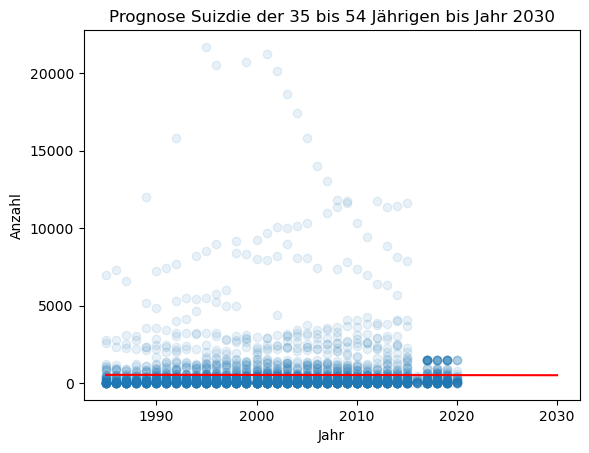

In [672]:
#Lineare Regression 
regressor_thirtyfive = LinearRegression()

#Input Variable 
x_thirtyfive = thirtyfive['year']

#Output-Variable 
y_thirtyfive = thirtyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_thirtyfive_train,x_thirtyfive_test,y_thirtyfive_train,y_thirtytfive_test=train_test_split(x_thirtyfive,y_thirtyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_thirtyfive.fit(np.array(x_thirtyfive_train).reshape(-1, 1), np.array(y_thirtyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_th = np.linspace(min(x_thirtyfive_train), 2030, 500)

#Arrray für y 
y_th = regressor_thirtyfive.coef_ * x_th + regressor_thirtyfive.intercept_

#Umformung in 2D-Array 
y_th = y_th.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_thirtyfive_train, y = y_thirtyfive_train, alpha = 0.1)
plt.plot(x_th, y_th, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 35 bis 54 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show() 

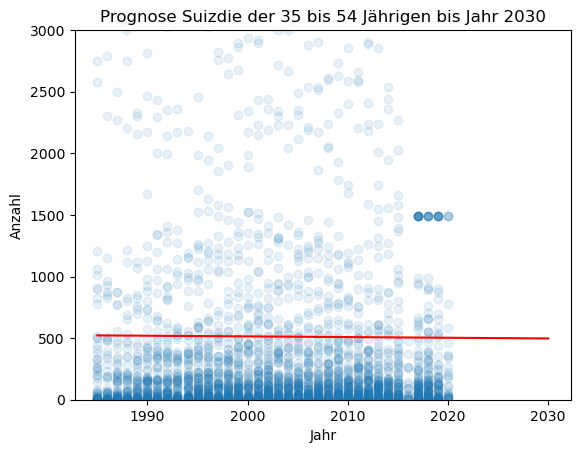

In [673]:
#Bessere (aber unvolllständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_thirtyfive_train, y = y_thirtyfive_train, alpha = 0.1)
plt.plot(x_th, y_th, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 35 bis 54 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,3000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show() 

In [674]:
#Steigung lineare Progression
print(regressor_thirtyfive.coef_)

#Suizide der 34-55 Jährigen für 2030
thirtyfive_2030 = np.array([[2030]])  
thirtyfive_predict = regressor_thirtyfive.predict(thirtyfive_2030)
print(thirtyfive_predict)

[[-0.55157428]]
[[497.42024543]]


In [675]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide bei 35-54 Jährigen um 0.55157428
#in 2030 wird es wahrscheinlich 497.42024543 Suizide der 35-54 Jährigen geben

In [676]:
#Trainingsfehler der linearen Regression
y_thirtyfive_train_pred = regressor_thirtyfive.predict(np.array(x_thirtyfive_train).reshape(-1,1))
r2_thirtyfive =  r2_score(y_thirtyfive_train, y_thirtyfive_train_pred)
MSE_thirtyfive =  mean_squared_error(y_thirtyfive_train, y_thirtyfive_train_pred)
print(r2_thirtyfive)
print(MSE_thirtyfive)

1.0918283341321278e-05
2446899.2308146814


In [677]:
#Alle Suizide der 55 bis 75 Jährigen
word = '55-74 years'

suicide_55 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_55 = dataclean[dataclean['age'] == word]['year'].tolist()
fiftyfive = pd.DataFrame({'suicide': suicide_55, 'year': year_55})

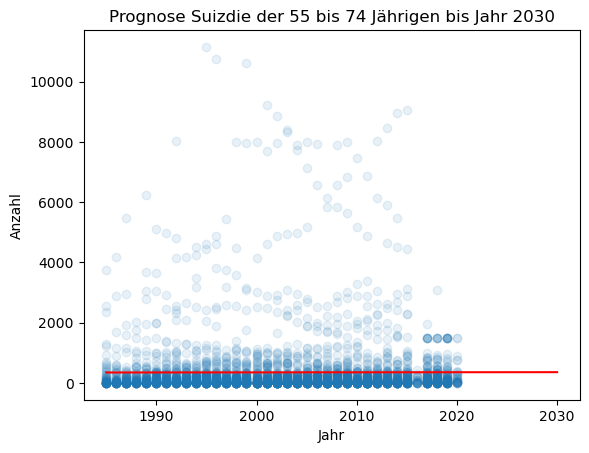

In [678]:
#Lineare Regression 
regressor_fiftyfive = LinearRegression()

#Input Variable 
x_fiftyfive = fiftyfive['year']

#Output-Variable 
y_fiftyfive = fiftyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_fiftyfive_train,x_fiftyfive_test,y_fiftyfive_train,y_fiftyfive_test=train_test_split(x_fiftyfive,y_fiftyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_fiftyfive.fit(np.array(x_fiftyfive_train).reshape(-1, 1), np.array(y_fiftyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_fift = np.linspace(min(x_fiftyfive_train), 2030, 500)

#Arrray für y 
y_fift = regressor_fiftyfive.coef_ * x_fift + regressor_fiftyfive.intercept_

#Umformung in 2D-Array 
y_fift = y_fift.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_fiftyfive_train, y = y_fiftyfive_train, alpha = 0.1)
plt.plot(x_fift, y_fift, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 55 bis 74 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()


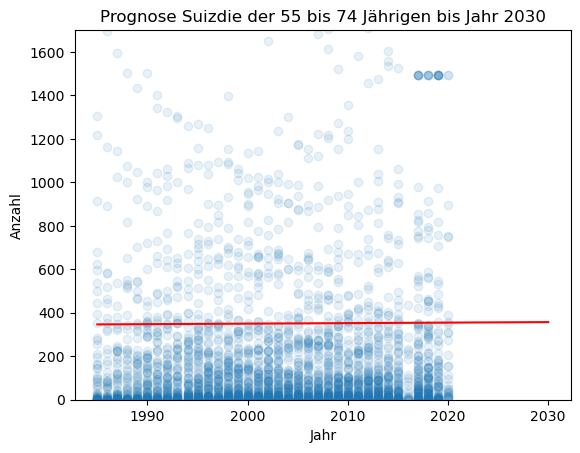

In [679]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_fiftyfive_train, y = y_fiftyfive_train, alpha = 0.1)
plt.plot(x_fift, y_fift, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der 55 bis 74 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1700)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [680]:
#Steigung lineare Progression
print(regressor_fiftyfive.coef_)

#Suizide der 55-74 Jährigen für 2030
fiftyfive_2030 = np.array([[2030]])  
fiftyfive_predict = regressor_fiftyfive.predict(fiftyfive_2030)
print(fiftyfive_predict)

[[0.23514816]]
[[357.00508449]]


In [681]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei 55-74 Jährigen um 0.23514816
#in 2030 wird es wahrscheinlich 357.00508449 Suizide der 55-74 Jährigen 

In [682]:
#Trainingsfehler der linearen Regression
y_fiftyfive_train_pred = regressor_fiftyfive.predict(np.array(x_fiftyfive_train).reshape(-1,1))
r2_fiftyfive =  r2_score(y_fiftyfive_train, y_fiftyfive_train_pred)
MSE_fiftyfive =  mean_squared_error(y_fiftyfive_train, y_fiftyfive_train_pred)
print(r2_fiftyfive)
print(MSE_fiftyfive)

4.9636264232155725e-06
978248.2829960133


In [683]:
#Alle Suizdie der über 75 Jährigen
word = '75+ years'
suicide_75 = dataclean[dataclean['age'] == word]['suicides_no'].tolist()
year_75 = dataclean[dataclean['age'] == word]['year'].tolist()
seventyfive = pd.DataFrame({'suicide': suicide_75, 'year': year_75})

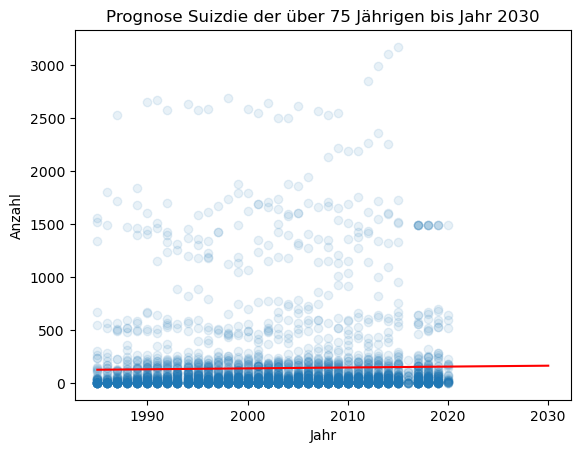

In [684]:
#Lineare Regression 
regressor_seventyfive = LinearRegression()

#Input Variable 
x_seventyfive = seventyfive['year']

#Output-Variable 
y_seventyfive = seventyfive['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_seventyfive_train,x_seventyfive_test,y_seventyfive_train,y_seventyfive_test=train_test_split(x_seventyfive,y_seventyfive,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_seventyfive.fit(np.array(x_seventyfive_train).reshape(-1, 1), np.array(y_seventyfive_train).reshape(-1, 1))

#Array für x bis 2030
x_s = np.linspace(min(x_seventyfive_train), 2030, 500)

#Arrray für y 
y_s = regressor_seventyfive.coef_ * x_s + regressor_seventyfive.intercept_

#Umformung in 2D-Array 
y_s = y_s.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_seventyfive_train, y = y_seventyfive_train, alpha = 0.1)
plt.plot(x_s, y_s, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der über 75 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

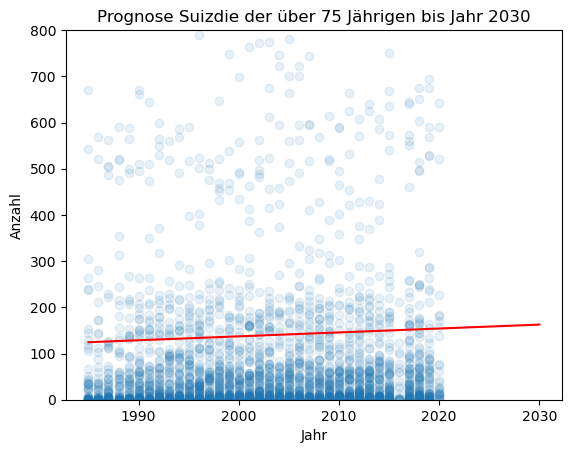

In [685]:
#Bessere (aber unvollständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_seventyfive_train, y = y_seventyfive_train, alpha = 0.1)
plt.plot(x_s, y_s, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der über 75 Jährigen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,800)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [686]:
#Steigung lineare Progression
print(regressor_seventyfive.coef_)

#Suizide der über 75 Jährigen für 2030
seventyfive_2030 = np.array([[2030]])  
seventyfive_predict = regressor_seventyfive.predict(seventyfive_2030)
print(seventyfive_predict)

[[0.84695093]]
[[162.60129742]]


In [687]:
#Interpretation:
#pro Jahr steigt die Anzahl der Suizide bei über 75 Jährigen um 0.84695093
#in 2030 wird es wahrscheinlich 162.60129742 Suizide der über 75 jährigen geben

In [688]:
#Trainingsfehler der linearen Regression
y_seventyfive_train_pred = regressor_seventyfive.predict(np.array(x_seventyfive_train).reshape(-1,1))
r2_seventyfive =  r2_score(y_seventyfive_train, y_seventyfive_train_pred)
MSE_seventyfive =  mean_squared_error(y_seventyfive_train, y_seventyfive_train_pred)
print(r2_seventyfive)
print(MSE_seventyfive)

0.0004806975607341002
130979.38272418322


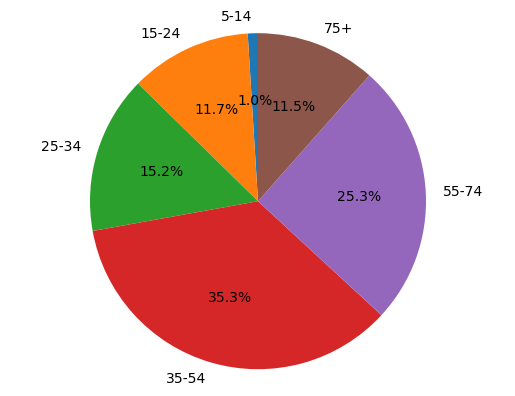

In [689]:
#Kuchendiagramm Altersgruppen
alter = {
    '5-14': five_predict,
    '15-24': fiveteen_predict,
    '25-34':twentyfive_predict,
    '35-54': thirtyfive_predict,
    '55-74': fiftyfive_predict,
    '75+': seventyfive_predict
}
a = pd.DataFrame(list(alter.items()), columns = ['Variable','Wert'])
plt.pie(a['Wert'], labels = a['Variable'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

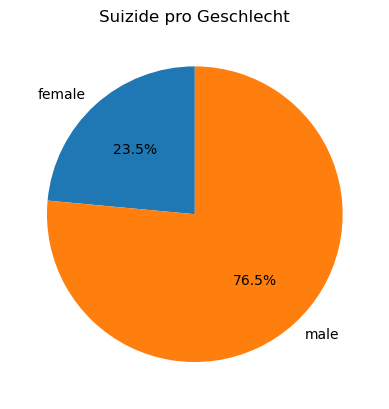

In [690]:
#Aufsummieren aller Suizide für jedes Geschlecht 
sex_no = dataclean.groupby('sex')['suicides_no'].sum().reset_index()

#Farben des Kuchendiagramms 
colors = ['#FF9999', '#66B2FF']

#Kuchendiagramm erstellen
plt.pie(sex_no['suicides_no'], labels=['female', 'male'],autopct='%1.1f%%', startangle=90 )

#Titel des Kuchendiagramms 
plt.title('Suizide pro Geschlecht')

#Ausgabe 
plt.show()

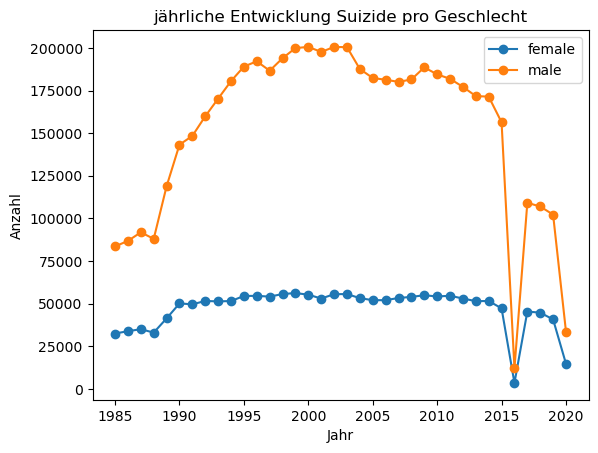

In [691]:
#Aufsummieren aller Suizide pro Geschlecht pro Jahr 
datahelp_sex = dataclean.groupby(['year','sex'])['suicides_no'].sum().reset_index()

#Erstellung Liniendiagramm
for sex, suicides in datahelp_sex.groupby('sex'):
    plt.plot(suicides['year'], suicides['suicides_no'], label=sex, marker='o')

#Titel des Liniendiagramms 
plt.title('jährliche Entwicklung Suizide pro Geschlecht')

#Beschriftung X-Achse 
plt.xlabel('Jahr')

#Beschriftung Y-Achse 
plt.ylabel('Anzahl')

#Legende anzeigen
plt.legend()

#Ausgabe Liniendiagramm
plt.show()

In [692]:
#Alle Suizide der Frauen
word = 'female'
suicide_female = dataclean[dataclean['sex'] == word]['suicides_no'].tolist()
year_female = dataclean[dataclean['sex'] == word]['year'].tolist()

#Neue Tabelle 
female = pd.DataFrame({'suicide': suicide_female, 'year': year_female})

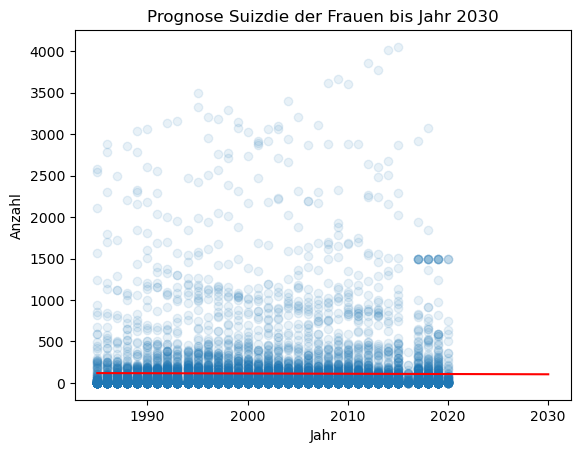

In [693]:
#Lineare Regression 
regressor_female = LinearRegression()

#Input Variable 
x_female = female['year']

#Output-Variable 
y_female = female['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_female_train,x_female_test,y_female_train,y_female_test=train_test_split(x_female,y_female,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_female.fit(np.array(x_female_train).reshape(-1, 1), np.array(y_female_train).reshape(-1, 1))

#Array für x bis 2030
x_f = np.linspace(min(x_female_train), 2030)

#Arrray für y 
y_f = regressor_female.coef_ * x_f + regressor_female.intercept_

#Umformung in 2D-Array 
y_f = y_f.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_female_train, y = y_female_train, alpha = 0.1)
plt.plot(x_f, y_f, c = 'r')

#Titel des Diagramms 
plt.title('Prognose Suizdie der Frauen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

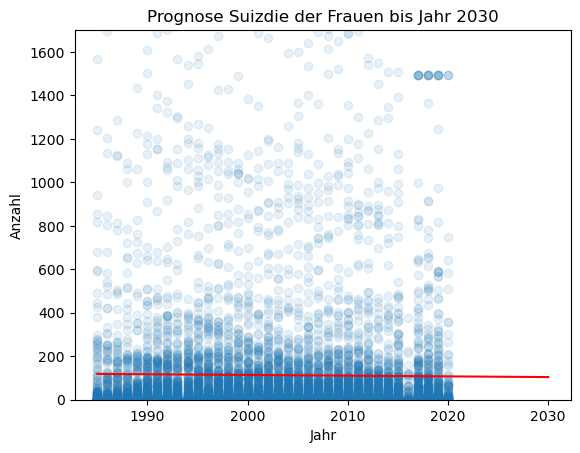

In [694]:
#Bessere (aber unvollständige) Darstellung
#Diagramm erstellen
plt.scatter(x = x_female_train, y = y_female_train, alpha = 0.1)
plt.plot(x_f, y_f, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Frauen bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,1700)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [695]:
#Steigung lineare Progression
print(regressor_female.coef_)

#Suizide der Frauen für 2030
female_2030 = np.array([[2030]])  
female_predict = regressor_female.predict(female_2030)
print(female_predict)

[[-0.32429377]]
[[104.15467027]]


In [696]:
#Interpretation:
#pro Jahr sinkt die Anzahl der Suizide der Frauen um 0.32429377
#im Jahr 2030 wird es wahrscheinlich 104.15467027 weibliche Suizide geben 

In [697]:
#Trainingsfehler der linearen Regression
y_female_train_pred = regressor_female.predict(np.array(x_female_train).reshape(-1,1))
r2_female =  r2_score(y_female_train, y_female_train_pred)
MSE_female =  mean_squared_error(y_female_train, y_female_train_pred)
print(r2_female)
print(MSE_female)

8.459509240388297e-05
110369.62543117287


In [698]:
#Alle Suizide der Männer
word = 'male'
suicide_male = dataclean[dataclean['sex'] == word]['suicides_no'].tolist()
year_male = dataclean[dataclean['sex'] == word]['year'].tolist()
#neue Tabelle
male = pd.DataFrame({'suicide': suicide_male, 'year': year_male})

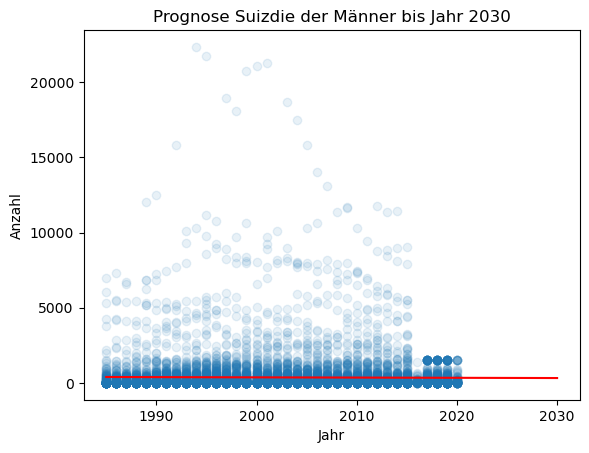

In [699]:
#Lineare Regression 
regressor_male = LinearRegression()

#Input Variable 
x_male = male['year']

#Output-Variable 
y_male = male['suicide']

#Aufteilen in Test- und Trainingsdaten 
x_male_train,x_male_test,y_male_train,y_male_test=train_test_split(x_male,y_male,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_male.fit(np.array(x_male_train).reshape(-1, 1), np.array(y_male_train).reshape(-1, 1))

#Array für x bis 2030
x_m = np.linspace(min(x_male_train), 2030, 500)

#Arrray für y 
y_m = regressor_male.coef_ * x_m + regressor_male.intercept_

#Umformung in 2D-Array 
y_m = y_m.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_male_train, y = y_male_train, alpha = 0.1)
plt.plot(x_m, y_m, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Männer bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

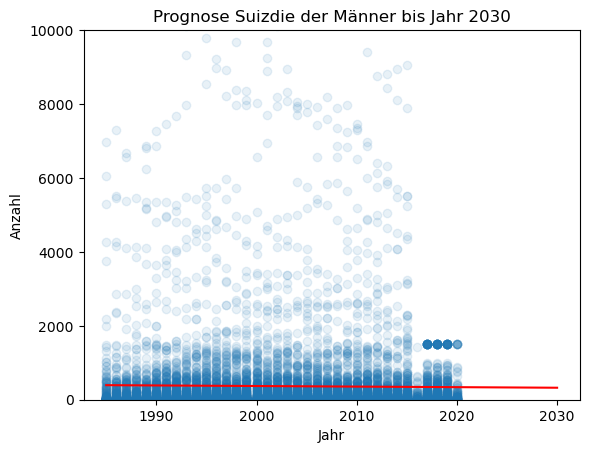

In [700]:
#Bessere (aber unvollständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_male_train, y = y_male_train, alpha = 0.1)
plt.plot(x_m, y_m, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose Suizdie der Männer bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,10000)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [701]:
#Steigung lineare Progression
print(regressor_male.coef_)

#Suizide der Männer für 2030
male_2030 = np.array([[2030]])  
male_predict = regressor_male.predict(male_2030)
print(male_predict)

[[-1.54373504]]
[[324.44506952]]


In [702]:
#Interpretation
#pro jahr sinken die männlichen Suizide um 1.54373504
#in 2030 wird es wahrscheinlich 324.44506952 männliche Suizide geben

In [703]:
#Trainingsfehler der linearen Regression
y_male_train_pred = regressor_male.predict(np.array(x_male_train).reshape(-1,1))
r2_male =  r2_score(y_male_train, y_male_train_pred)
MSE_male =  mean_squared_error(y_male_train, y_male_train_pred)
print(r2_male)
print(MSE_male)

0.00014988144806737935
1411519.308776004


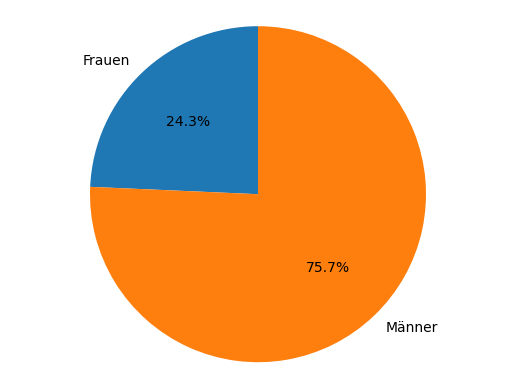

In [704]:
#Kuchendiagramm Geschlecht
geschlecht = {
    'Frauen': female_predict,
    'Männer':male_predict
}
g = pd.DataFrame(list(geschlecht.items()), columns = ['Variable','Wert'])
plt.pie(g['Wert'], labels = g['Variable'], autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.show()

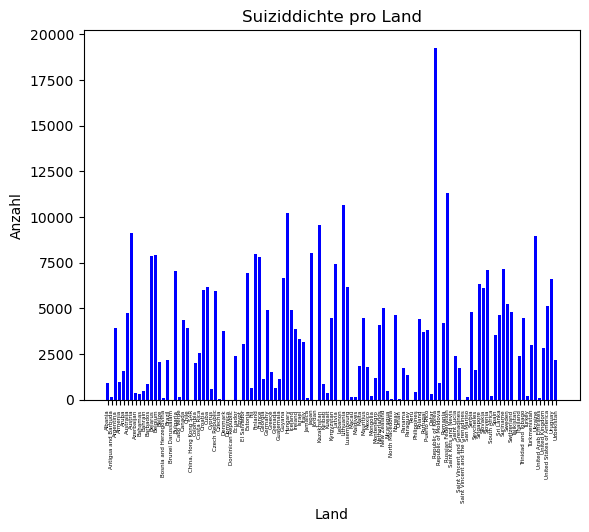

In [705]:
#Aufsummieren aller Suizide pro 100k Einwhoner für jedes Land 
country2_no = dataclean.groupby('country')['suicides/100k pop'].sum().reset_index()

#Balkendiagramm erstelllen
plt.bar(country2_no['country'], country2_no['suicides/100k pop'], color = 'blue')

#Titel des Balkendiagramms
plt.title('Suiziddichte pro Land')

#X-Achse rotieren und Schriftgröße ändern
plt.xticks(rotation='vertical', fontsize = 4)

#X-Achsen Beschriftung 
plt.xlabel('Land')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe Balkendiagramms 
plt.show()

In [706]:
#Sortieren der HDI-Werte 
H = pd.DataFrame(merged_data)
H_sorted = H.sort_values(by='hdi')

In [707]:
#Null-Werte des HDI#s löschen
Hclean = H_sorted.loc[(H['suicides_no'] != 0)]

In [708]:
#Gruppieren alle gleichen HDI-Werte 
x = 12515
Hgruppe = Hclean.head(x).groupby('hdi')['suicides_no'].sum().reset_index()

In [709]:
#Gruppieren aller HDI-Werte in kleinere Gruppen
hilf = pd.DataFrame(Hgruppe)
bins = pd.cut(hilf['hdi'], bins = 6, labels = False)
HDI = hilf.groupby(bins)['suicides_no'].sum().reset_index()
print(HDI)

   hdi  suicides_no
0    0       1000.0
1    1      17849.0
2    2      86004.0
3    3     333714.0
4    4     259112.0
5    5     270893.0


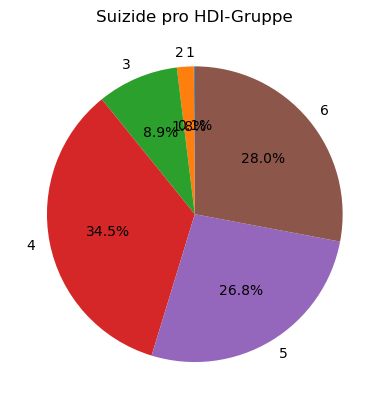

In [710]:
#Aufsummierung aller Suizide pro HDI-Gruppe
hdi_no = HDI.groupby('hdi')['suicides_no'].sum().reset_index()

#Liniendiagramm erstellen
plt.pie(HDI['suicides_no'], labels = ['1', '2', '3', '4', '5','6'], autopct='%1.1f%%', startangle=90)

#Titel des Liniendiagramm 
plt.title('Suizide pro HDI-Gruppe')

#Ausgabe Balkendaigramm
plt.show()

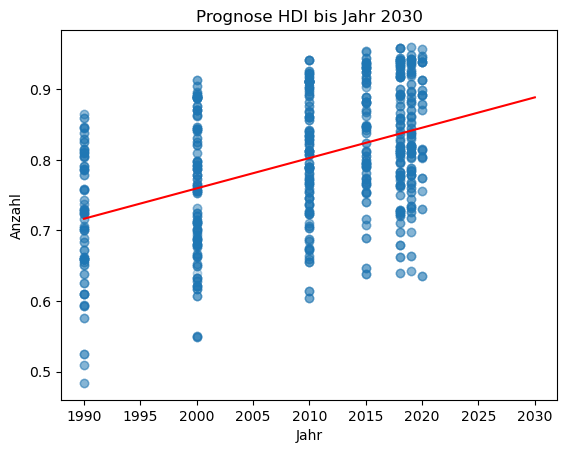

In [711]:
#Lineare Regression 
regressor_hdi = LinearRegression()

#Input Variable 
x_hdi = merged_data['year']

#Output-Variable 
y_hdi = merged_data['hdi']

#Aufteilen in Test- und Trainingsdaten 
x_hdi_train,x_hdi_test,y_hdi_train,y_hdi_test=train_test_split(x_hdi,y_hdi,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_hdi.fit(np.array(x_hdi_train).reshape(-1, 1), np.array(y_hdi_train).reshape(-1, 1))

#Array für x bis 2030
x_h = np.linspace(min(x_hdi_train), 2030, 500)

#Arrray für y 
y_h = regressor_hdi.coef_ * x_h + regressor_hdi.intercept_

#Umformung in 2D-Array 
y_h = y_h.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_hdi_train, y = y_hdi_train, alpha = 0.1)
plt.plot(x_h, y_h, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose HDI bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [712]:
#Steigung lineare Progression
print(regressor_hdi.coef_)

#HDI für 2030
hdi_2030 = np.array([[2030]])  
hdi_predict = regressor_hdi.predict(hdi_2030)
print(hdi_predict)

[[0.00429872]]
[[0.88855046]]


In [713]:
#Interpretation: 
#pro Jahr steigt der HDI durchschnittlich um 0.00429872 weltweit 
# In 2030 wird der HDI durchschnittlich wahrscheinlich 0.88855046 betragen 

In [714]:
#Trainingsfehler der linearen Regression
y_hdi_train_pred = regressor_hdi.predict(np.array(x_hdi_train).reshape(-1,1))
r2_hdi =  r2_score(y_hdi_train, y_hdi_train_pred)
MSE_hdi =  mean_squared_error(y_hdi_train, y_hdi_train_pred)
print(r2_hdi)
print(MSE_hdi)

0.19612761754348296
0.007456574097769366


In [715]:
#Sortieren der GDP-Werte 
G = pd.DataFrame(dataclean)
G_sorted = G.sort_values(by='gdp_for_year ($)')

In [716]:
#Null-Werte des GDP löschen
Gclean = G_sorted.loc[~G_sorted['suicides/100k pop'].isin([0, np.nan])]

In [717]:
#Gruppieren  aller gleichen GDP_Werte 
x = 25980
num = 20
Ggruppe = Gclean.head(x).groupby(pd.cut(Gclean['gdp_for_year ($)'], bins = num))['suicides/100k pop'].sum().reset_index()
print(Ggruppe)

                          gdp_for_year ($)  suicides/100k pop
0     (-50953033455.375, 2550044573643.75]      345375.914821
1      (2550044573643.75, 5100042227662.5]       10714.282311
2      (5100042227662.5, 7650039881681.25]        2752.363751
3     (7650039881681.25, 10200037535700.0]         812.780000
4    (10200037535700.0, 12750035189718.75]         737.420163
5    (12750035189718.75, 15300032843737.5]         907.250000
6    (15300032843737.5, 17850030497756.25]         665.500000
7    (17850030497756.25, 20400028151775.0]         180.302623
8   (20400028151775.0, 22950025805793.754]          13.778918
9   (22950025805793.754, 25500023459812.5]           0.000000
10  (25500023459812.5, 28050021113831.246]           0.000000
11  (28050021113831.246, 30600018767850.0]           0.000000
12  (30600018767850.0, 33150016421868.754]           0.000000
13  (33150016421868.754, 35700014075887.5]           0.000000
14   (35700014075887.5, 38250011729906.25]           0.000000
15   (38

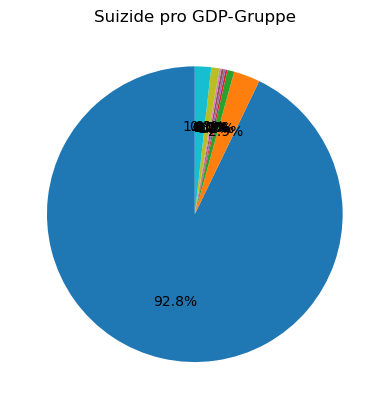

In [718]:
#Aufsummierung aller Suizide pro GDP-Gruppe
gdp_no = Ggruppe.groupby('gdp_for_year ($)')['suicides/100k pop'].sum().reset_index()

#Liniendiagramm erstellen
plt.pie(gdp_no['suicides/100k pop'],autopct='%1.1f%%', startangle=90)


#Titel des Liniendiagramm 
plt.title('Suizide pro GDP-Gruppe')

#Ausgabe Balkendaigramm
plt.show()

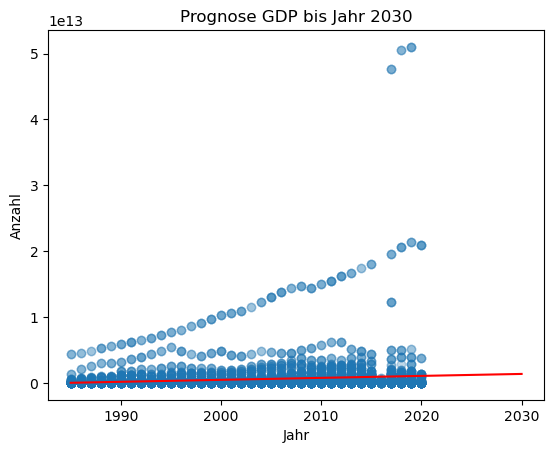

In [719]:
#Lineare Regression 
regressor_gdp = LinearRegression()

#Input Variable 
x_gdp = dataclean['year']

#Output-Variable 
y_gdp = dataclean['gdp_for_year ($)']

#Aufteilen in Test- und Trainingsdaten 
x_gdp_train,x_gdp_test,y_gdp_train,y_gdp_test=train_test_split(x_gdp,y_gdp,test_size=0.3, random_state= 1)

#Regression wird trainiert
regressor_gdp.fit(np.array(x_gdp_train).reshape(-1, 1), np.array(y_gdp_train).reshape(-1, 1))

#Array für x bis 2030
x_g = np.linspace(min(x_gdp_train), 2030, 500)

#Arrray für y 
y_g = regressor_gdp.coef_ * x_g + regressor_gdp.intercept_

#Umformung in 2D-Array 
y_g = y_g.reshape(-1, 1)

#Diagramm erstellen
plt.scatter(x = x_gdp_train, y = y_gdp_train, alpha = 0.1)
plt.plot(x_g, y_g, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose GDP bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

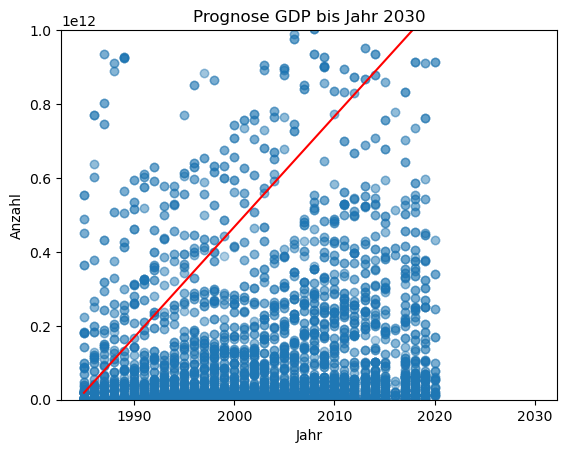

In [720]:
#Bessere (aber unvollständige) Darstellung 
#Diagramm erstellen
plt.scatter(x = x_gdp_train, y = y_gdp_train, alpha = 0.1)
plt.plot(x_g, y_g, c = 'r')

#Titel des Liniendiagramms 
plt.title('Prognose GDP bis Jahr 2030')

#X-Achsen Beschriftung 
plt.xlabel('Jahr')

#Y-Achsen Beschriftung 
plt.ylim(0,0.1e13)
plt.ylabel('Anzahl')

#Ausgabe lineare Reggression
plt.show()

In [721]:
#Steigung lineare Progression
print(regressor_gdp.coef_)

#GDP für 2030
gdp_2030 = np.array([[2030]])  
gdp_predict = regressor_gdp.predict(gdp_2030)
print(gdp_predict)

[[2.99212575e+10]]
[[1.36522845e+12]]


In [722]:
#Interpretation:
#pro Jahr steigt der GDP durchschnittlich um 2.99212575e+10
#in 2030 wird der GDP durchschnittlich 1.36522845e+12 betragen 

In [723]:
#Trainingsfehler der linearen Regression
y_gdp_train_pred = regressor_gdp.predict(np.array(x_gdp_train).reshape(-1,1))
r2_gdp =  r2_score(y_gdp_train, y_gdp_train_pred)
MSE_gdp =  mean_squared_error(y_gdp_train, y_gdp_train_pred)
print(r2_gdp)
print(MSE_gdp)

0.014343896093661823
5.447726267218812e+24
